1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형)

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화

 히스토그램/ 상자그림
2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사
carrier_deay : 항공사 지연 요인
atc_delay : ATC 항공교통관제 지연 요인
weather_delay : 날씨로 인한 지연 요인

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# _Pandas_ boxplots of a column can be grouped by a different column.
df = pd.read_csv('./data/airline_stats.csv')

df.head()

#범주형변수 airline
#수치형변수 
df


,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [3]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [4]:
df1=df.select_dtypes(include='number')
df1.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [53]:
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].agg(['min', 'median', 'max','mean'])

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
min,0.000000,0.000000,0.000000
median,6.356893,3.900000,0.316002
max,100.000000,100.000000,33.333333
mean,7.041475,5.089962,0.684776


In [6]:
df['pct_carrier_delay'].max()

np.float64(100.0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [8]:
df.select_dtypes(exclude='number').head()


,airline
0,American
1,American
2,American
3,American
4,American


In [9]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [10]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [11]:
df.groupby('airline') #집계평균
df.groupby('airline').describe().T
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


In [12]:
df.groupby('airline') #집계평균
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


1. 1차원데이터분석

1.** 변수종류파악( 수치형/ 범주형/ 시간형)

2.** 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3.** 시각화

도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석

1.** 공분산/ 상관계수

2.** 다중공선성확인

3.** 시각화

산점도/ 회귀직선/ 히트맵
항공사 지연요인 데이터 탐색적 분석
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사
carrier_deay : 항공사 지연 요인
atc_delay : ATC 항공교통관제 지연 요인
weather_delay : 날씨로 인한 지연 요인


In [13]:
#1차원 데이터 분석
df1=df.select_dtypes(include='number')
df1.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [14]:
#1. 변수종류파악( 수치형/ 범주형/ 시간형)
df1=df.select_dtypes(include='number')
df1
# 수치형 데이터 확인

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194
...,...,...,...
33463,6.186422,8.798491,1.651940
33464,9.522167,3.591133,0.261084
33465,9.164179,2.664179,0.343284
33466,5.152293,1.964520,0.122817


In [15]:
# 범주형 데이터 확인
df1=df.select_dtypes(exclude='number')
df1

,airline
0,American
1,American
2,American
3,American
4,American
...,...
33463,Southwest
33464,Southwest
33465,Southwest
33466,Southwest


In [16]:
#2.** 변수종류별분석지표( 수치형/ 범주형/ 시간형)
df1=df.select_dtypes(exclude='number')
print(df1.describe())
print('\n')
print(df1['airline'].unique())



       airline
count    33468
unique       6
top      Delta
freq      9107


['American' 'Alaska' 'Jet Blue' 'Delta' 'United' 'Southwest']


(array([5725.,    0.,    0.,    0., 3851.,    0.,    0.,    0., 3775.,
           0.,    0.,    0., 9107.,    0.,    0.,    0., 5426.,    0.,
           0., 5584.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

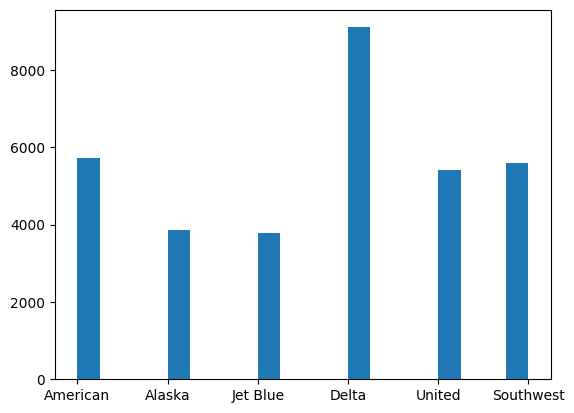

In [17]:
#3.** 시각화

#도수 분포요/ 히스토그램 / 상자그림

#1변량 : 히스토그램
plt.hist(data=df,  x='airline',bins=20)

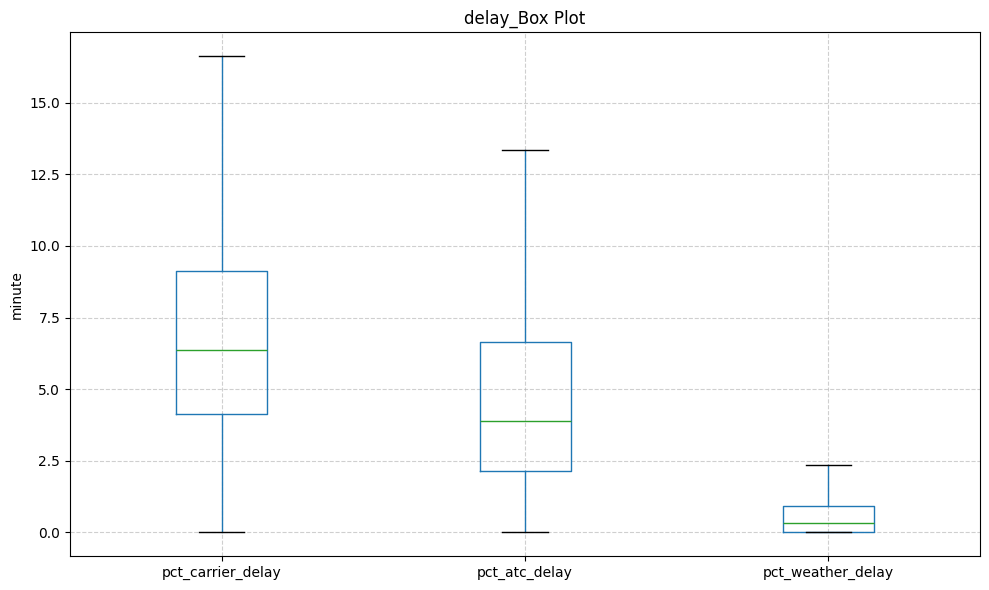

In [54]:
df.dropna()
plt.figure(figsize=(10, 6))
df.boxplot(showfliers=False)
plt.title('delay_Box Plot')
plt.ylabel('minute')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

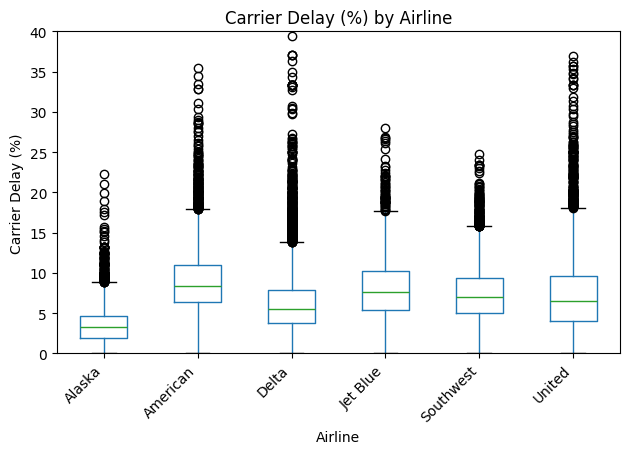

In [56]:
df.dropna() # 결측치 제거
plt.figure(figsize=(12, 6))

# 항공사별 boxplot 그리기

df.boxplot(column='pct_carrier_delay', by='airline', grid=False)

# 4) 제목·레이블 다듬기
plt.title('Carrier Delay (%) by Airline')
plt.suptitle('')             # pandas가 자동으로 붙이는 'column by airline' 제목 제거
plt.ylim(0, 40) #y값 범위지정

plt.xlabel('Airline')
plt.ylabel('Carrier Delay (%)')

# 5) x축 글자 기울이기 & 레이아웃 정리
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 6) 출력
plt.show()

In [28]:
#공분산 
df1=df.select_dtypes(include='number')
df1
df1.cov()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.228366,3.066107,0.779800
pct_atc_delay,3.066107,22.265627,0.464758
pct_weather_delay,0.779800,0.464758,1.152925


In [ ]:
# 상관계수
df1.corr() 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


In [ ]:
# 다중공산성확인 
df1.corr() 
#상관계수가 모두 0.2 이하기 떄문에 상관관계가 매우적고 따라서 다중공산성이 발생하지 않는다.
# 다중공산성은 상관관계가 0.8이상으로 매우 높을 때 발생하는 것인데 여기서는 모든 변수들이 상관없다.


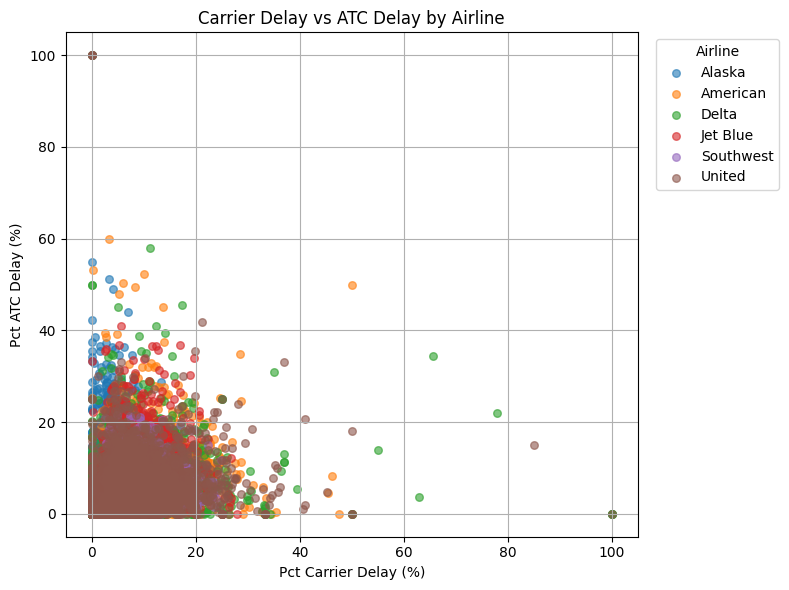

In [45]:
# 2) 산점도 그리기: pct_carrier_delay vs pct_atc_delay
plt.figure(figsize=(8, 6))

for airline, grp in df.groupby('airline'):
    plt.scatter(
        grp['pct_carrier_delay'],
        grp['pct_atc_delay'],
        label=airline,
        alpha=0.6,
        s=30
    )

plt.xlabel('Pct Carrier Delay (%)')
plt.ylabel('Pct ATC Delay (%)')
plt.title('Carrier Delay vs ATC Delay by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

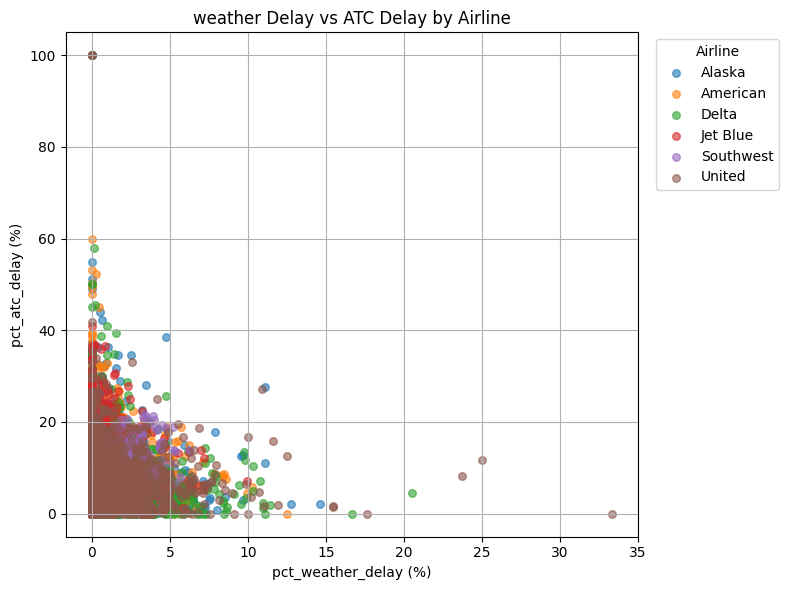

In [44]:
plt.figure(figsize=(8, 6))

for airline, grp in df.groupby('airline'):
    plt.scatter(
        grp['pct_weather_delay'],
        grp['pct_atc_delay'],
        label=airline,
        alpha=0.6,
        s=30
    )

plt.xlabel('pct_weather_delay (%)')
plt.ylabel('pct_atc_delay (%)')
plt.title('weather Delay vs ATC Delay by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

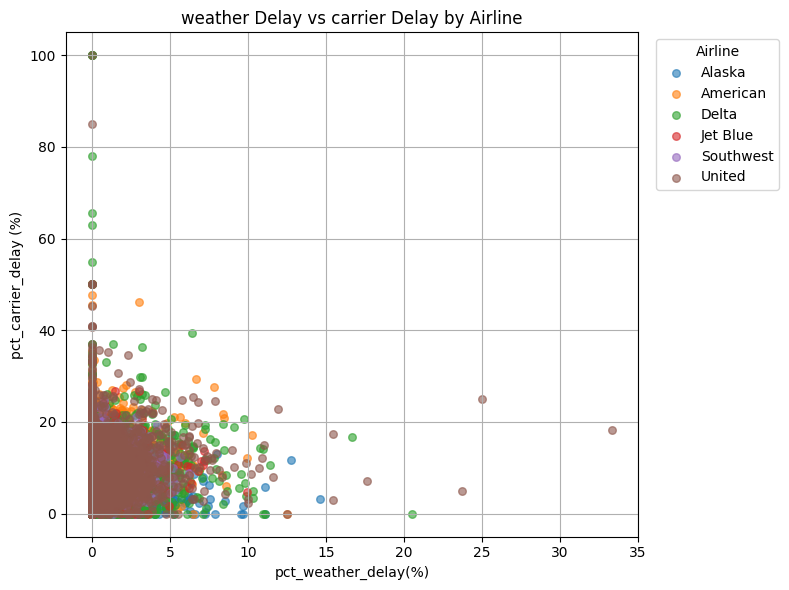

In [50]:
plt.figure(figsize=(8, 6))

for airline, grp in df.groupby('airline'):
    plt.scatter(
        grp['pct_weather_delay'],
        grp['pct_carrier_delay'],
        label=airline,
        alpha=0.6,
        s=30
    )

plt.xlabel('pct_weather_delay(%)')
plt.ylabel('pct_carrier_delay (%)')
plt.title('weather Delay vs carrier Delay by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
#실제로 세가지의 산포도를 분석해보니 어떠한 상관관계도 있지 않은것을 알 수 있다.

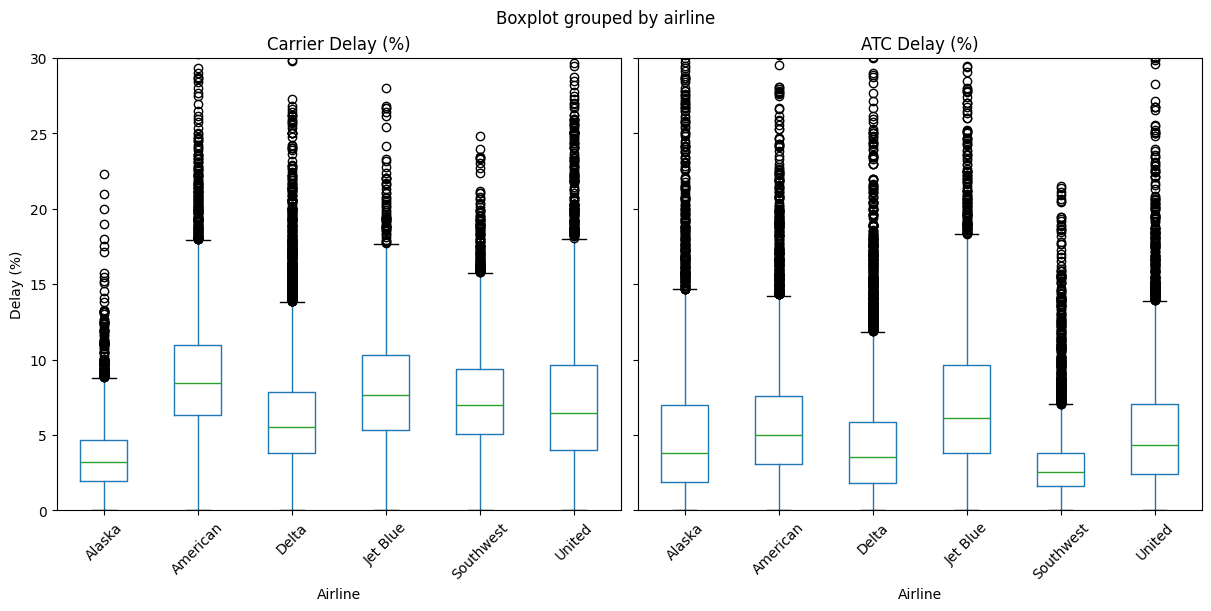

In [ ]:
# 1) 데이터 로드 및 결측치 제거
df = pd.read_csv('./data/airline_stats.csv')
df_clean = df.dropna(subset=['pct_carrier_delay', 'pct_atc_delay'])

# 2) 서브플롯 생성: 1행 2열, y축 공유
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 6),
    sharey=True,
    constrained_layout=True
)

# 3) 그릴 지연 유형과 제목 정의
metrics = ['pct_carrier_delay', 'pct_atc_delay']
titles  = ['Carrier Delay (%)',   'ATC Delay (%)']

# 4) 각 서브플롯에 boxplot 그리기
for ax, metric, title in zip(axes, metrics, titles):
    df_clean.boxplot(
        column=metric,
        by='airline',
        ax=ax,
        grid=False
    )
    ax.set_title(title)
    ax.set_xlabel('Airline')
    if ax is axes[0]:
        ax.set_ylabel('Delay (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 30)
    # y축 범위 0~30으로 고정
   
    #알레스카항공사와 델타항공사가 전반적으로 지연시간이 짧아서 항공사 자체나 교통관제에 의한 지연상황에 대해 능숙하다고 예상할 수 있다.
    
    
    

<Figure size 1000x600 with 0 Axes>

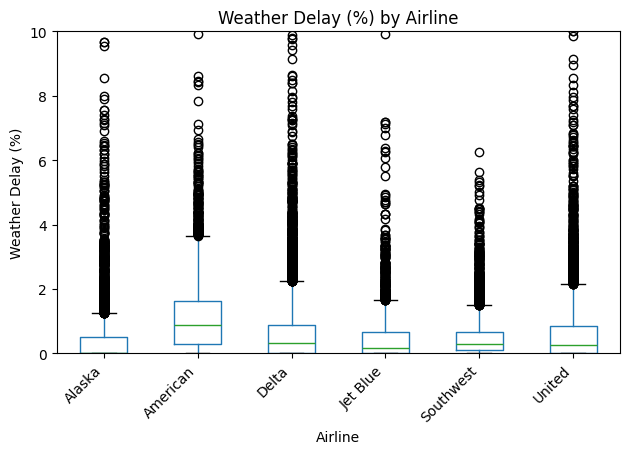

In [81]:
df = pd.read_csv('./data/airline_stats.csv')
df_clean = df.dropna(subset=['pct_weather_delay'])

# 2) 박스플롯 그리기
plt.figure(figsize=(10, 6))
df_clean.boxplot(
    column='pct_weather_delay',
    by='airline',
    grid=False
)

# 3) 레이아웃 다듬기
plt.title('Weather Delay (%) by Airline')
plt.suptitle('')                       # 자동 부제목 제거
plt.xlabel('Airline')
plt.ylabel('Weather Delay (%)')
plt.ylim(0, 10)                        # y축 범위 0~40으로 고정
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 4) 출력
plt.show()

#날씨지연의 경우에는 항공사, 관제지연에 비해 지연시간이 짧아서 구간을 짧게 두었다. 아메리칸 항공사가 날씨지연이 긴걸로 봐서 다른 항공사보다 보수적으로 대처하는 것 같다고 볼 수 있다.
#이외의 다른 항공사들은 거의 1분 전후로 크게 의미가 있지는 않다. 

In [78]:
# 상관계수 분석
df1.corr()
#상관계수 분석 결과 상관계수가 0.5 이상이어야 최소한의미를 가질 수 있는데 상관계수가 
# 모두 0.2 이하인 것을 보면 관제지연, 항공사지연 ,날씨 지연들을 서로 상관 관계가 거의 없고 독립적이라고 할 수 있다. 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


In [ ]:
#공분산 확인
df1.cov()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.228366,3.066107,0.779800
pct_atc_delay,3.066107,22.265627,0.464758
pct_weather_delay,0.779800,0.464758,1.152925


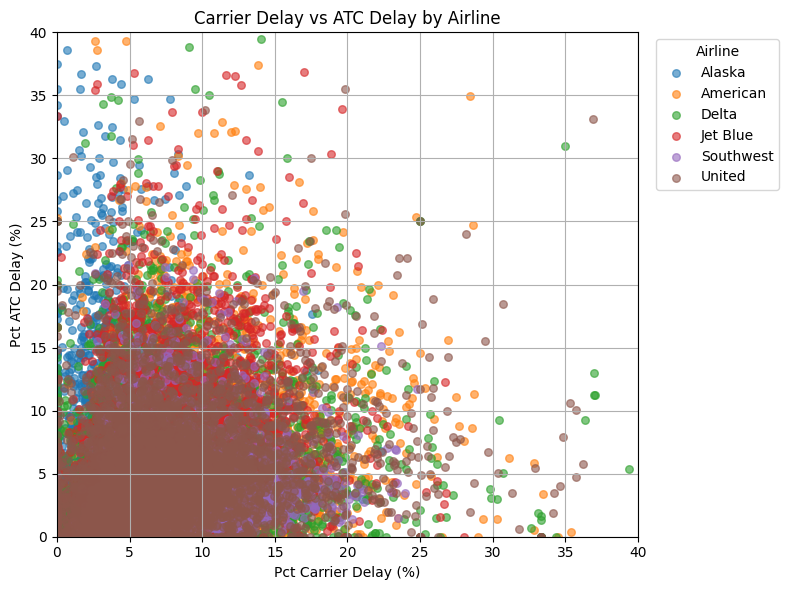

In [80]:
#추가분석

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for airline, grp in df.groupby('airline'):
    plt.scatter(
        grp['pct_carrier_delay'],
        grp['pct_atc_delay'],
        label=airline,
        alpha=0.6,
        s=30
    )

plt.xlabel('Pct Carrier Delay (%)')
plt.ylabel('Pct ATC Delay (%)')
plt.title('Carrier Delay vs ATC Delay by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)

# x·y 축 범위 고정
plt.xlim(0, 40)
plt.ylim(0, 40)

plt.tight_layout()
plt.show()

# 다음 표를보면 알 수 있지만 대표적으로 
#PCT Carrier Delay, ACT Carrier Delay는 상관계수가 0.14인데 산포도를 그려보니 역시나 상관관계를 찹아볼 수 없다.
#다른 관계들도 상관관계가 0.16, 0.09로  유의미한 값을 찾을 수 없을 것이다